In [395]:
import pandas as pd 
#import pandas_datareader as pdr  
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb 
import math
sb.set()


In [396]:
ticker = input("Enter the ticker of the stock you want to analyze (i.e. ^SPX, AAPL): ")
start = input("Enter the starting date for daily returns data in format YYYY-MM-DD")
end = input("Enter the ending date for daily returns data in format YYYY-MM-DD")
divs_of_subarr = int(input("Enter the number of subarrays as used in the algorithm"))
return_type = 'Adj Close'

In [397]:
raw_data = yf.download(ticker, start , end)
data = raw_data.pct_change()[1:].filter([return_type]) # calculated daily return
# raw_data['Price_Difference'] = raw_data['Close'] - raw_data['Open'] # calculated daily return
# data = raw_data[['Price_Difference']]
# We will use the column for Adjusted Close as the column to base our calculations upon
print(data)

[*********************100%%**********************]  1 of 1 completed

            Adj Close
Date                 
2020-01-03  -0.016006
2020-01-06   0.004194
2020-01-07   0.012107
2020-01-08   0.001876
2020-01-09   0.010983
...               ...
2024-04-24  -0.033316
2024-04-25   0.037087
2024-04-26   0.061756
2024-04-29   0.000251
2024-04-30  -0.015440

[1088 rows x 1 columns]


In [398]:
data_length = len(data)
print(data_length)

1088


In [399]:
regions_to_analyze = []

for i in range(0, divs_of_subarr):
    num_of_subarrays = 2**i
    min_size = data_length // num_of_subarrays
    remainder = data_length % num_of_subarrays
    
    current_region = []
    start_index = 0
    # Distribute the remainder by adding an extra element to some subarrays
    for i in range(num_of_subarrays):
        size = min_size + (1 if i < remainder else 0)
        current_region.append( data.iloc[start_index:start_index+size])
        start_index += size
    
    regions_to_analyze.append(current_region)
        
for region in regions_to_analyze:
    print(len(region))
    print(region)

1
[            Adj Close
Date                 
2020-01-03  -0.016006
2020-01-06   0.004194
2020-01-07   0.012107
2020-01-08   0.001876
2020-01-09   0.010983
...               ...
2024-04-24  -0.033316
2024-04-25   0.037087
2024-04-26   0.061756
2024-04-29   0.000251
2024-04-30  -0.015440

[1088 rows x 1 columns]]
2
[            Adj Close
Date                 
2020-01-03  -0.016006
2020-01-06   0.004194
2020-01-07   0.012107
2020-01-08   0.001876
2020-01-09   0.010983
...               ...
2022-02-23  -0.042882
2022-02-24   0.060794
2022-02-25   0.017223
2022-02-28   0.009438
2022-03-01  -0.037236

[544 rows x 1 columns],             Adj Close
Date                 
2022-03-02   0.031824
2022-03-03  -0.020892
2022-03-04  -0.032808
2022-03-07  -0.069062
2022-03-08   0.007587
...               ...
2024-04-24  -0.033316
2024-04-25   0.037087
2024-04-26   0.061756
2024-04-29   0.000251
2024-04-30  -0.015440

[544 rows x 1 columns]]
4
[            Adj Close
Date                 
2020-01-03  -

In [400]:
# Rescale range calculations

calculated_r = []
x_axis = [] # log of size
y_axis = [] # log of rescaled range, averaged


for region in regions_to_analyze:
  #print("Num of sub arrays: " , len(sub_list))
  size = 0
  tmp = []
  index_of_series = 0
  number_of_ranges_in_region = len(region)
  for time_series in region:
    # print(df)
    size = len(time_series) # number of data points, size of data
    
    #print("size: ", size)
    if index_of_series == 0:    # first range in region gets added to x-axis
      x_axis.append(math.log10(size)) # append the log size
      
    mean_df = time_series[return_type].mean() # the mean of the data
    
    std_df = time_series[return_type].std() # the standard deviation of the data
    print("standard deviation")
    print(std_df)
    
    result_df = time_series[return_type] - mean_df # new dataframe that stores elemental deviations
    print("array of deviations:")
    print(result_df)
    
    # modify dataframe to be the cumulative deviate series 
    result_df = result_df.cumsum()
    
    
    print( 'Widest difference: ')
    print (result_df.max()- result_df.min())

    r_t = result_df.max() - result_df.min() # range of deviations
    
    rescaled_range = r_t / std_df
    # print(f'Ranges in region: {number_of_ranges_in_region} \t Rescaled range: {rescaled_range}')
    tmp.append(rescaled_range)
    
    index_of_series+=1
  
  calculated_r.append(tmp)

print("x axis",x_axis)  
# print(calculated_r)

# find the rescaled range average of each sublist
for l in calculated_r:
  # print(l)
  avg = sum(l) / len(l) # find the average for each subarray
  y_axis.append(math.log10(avg)) #append log of rescaled range
  
print("y axis: ", y_axis)


standard deviation
0.03411198980742365
array of deviations:
Date
2020-01-03   -0.019040
2020-01-06    0.001159
2020-01-07    0.009072
2020-01-08   -0.001159
2020-01-09    0.007948
                ...   
2024-04-24   -0.036350
2024-04-25    0.034053
2024-04-26    0.058721
2024-04-29   -0.002783
2024-04-30   -0.018475
Name: Adj Close, Length: 1088, dtype: float64
Widest difference: 
1.5821845046687941
standard deviation
0.033229607822326736
array of deviations:
Date
2020-01-03   -0.019074
2020-01-06    0.001126
2020-01-07    0.009039
2020-01-08   -0.001192
2020-01-09    0.007915
                ...   
2022-02-23   -0.045949
2022-02-24    0.057726
2022-02-25    0.014155
2022-02-28    0.006370
2022-03-01   -0.040304
Name: Adj Close, Length: 544, dtype: float64
Widest difference: 
0.786346716876805
standard deviation
0.035002707629151225
array of deviations:
Date
2022-03-02    0.028823
2022-03-03   -0.023892
2022-03-04   -0.035808
2022-03-07   -0.072062
2022-03-08    0.004587
              

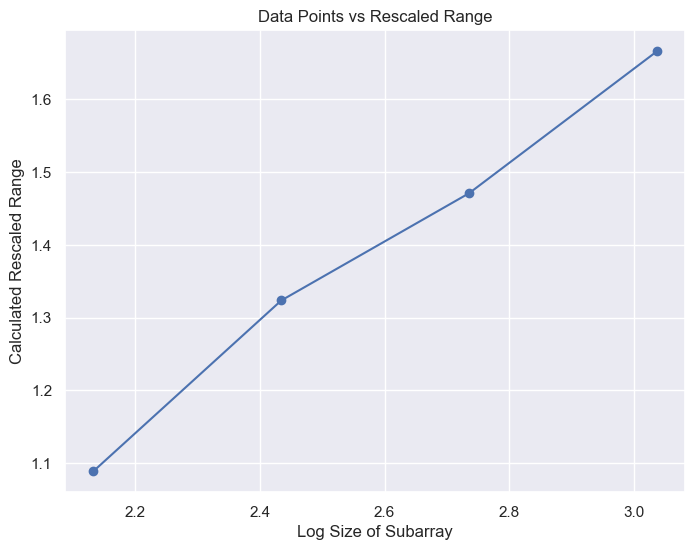

In [401]:
# Plot the line graph with dots for each data point
plt.plot(x_axis, y_axis, marker='o', linestyle='-')


# Add labels and title
plt.xlabel('Log Size of Subarray')
plt.ylabel('Calculated Rescaled Range')
plt.title('Data Points vs Rescaled Range')

# Show the plot
plt.show()

In [402]:
# Calculate H, which is the slope of the graph above

m, c = np.polyfit(x_axis, y_axis, 1)
print("Hearst coefficient is: ")
print(m)

Hearst coefficient is: 
0.624858572136233
